<center> <h2> DS 3000 - Spring 2020</h2> </center>
<center> <h3> DS Report </h3> </center>


<center> <h1>Identifying Visual Stimuli from fMRI Data</h1> </center>
<center><h4>Gweneth Andersen, Robert Passas, Sarel Kohen</h4></center>


<hr style="height:2px; border:none; color:black; background-color:black;">

#### Executive Summary

In this report, we use a human brain fMRI dataset collected by Schapiro et al. to examine the neurophysiological basis of event representation. The dataset includes images recorded during a behavioral task where subjects were shown a sequence of appearing and disappearing stimuli traversing a Hamiltonian path on a hidden graph structure which contained three densely connected communities. Participants were also told to indicate whether or not these graphical stimuli had been rotated as a cover task for the experiment. The researchers found that patterns of activity in certain brain regions (left IFG, left insula, left ATL, and left STG) represented stimuli within a common community more similarly to each other than to stimuli in other communities. Upon learning this, we wondered whether it might be possible to use machine learning techniques to classify these patterns by the region of visual space where the stimuli causing them appeared using the brain scans. Our main goal in this investigation was to construct a model capable of identifying which communities new stimuli belong to and whether they have transitioned between or within communities as they occur in the fMRI time series. As a first step, we looked simply to see if we could find differences between brain scans of those viewing intra-community transitions versus inter-community transitions. This analysis proved successful, showing that participants, at least on a subconscious level, were registering that stimuli were leaving or staying within their hidden communities. We next sought to prepare our data and predictive models to show that informative brain regions could be used to predict qualities of the stimuli. In order to apply learning algorithms to build such a model, we computed mask images for each subject's set of time series to cut the 139,264-voxel volumes down to more manageable sets of about 39,000 voxels. After labeling the volumes most nearly following each stimulus onset time with two target variables (the community to which each stimulus belonged and whether or not that community differed from the community of the previous stimulus), we tested our hypotheses with several classification algorithms. We found that certain support vector machine and ridge classifiers were able to classify stimulus transitions with as high as 88.0427% accuracy, and that SVM classifiers trained to identify community membership could do so with as high as 69.125% accuracy. Though we also mused that performance on the cover task might be a predictor of these accuracies, we found no significant correlation.


Schapiro, A., Rogers, T., Cordova, N. et al. Neural representations of events arise from temporal community structure. Nat Neurosci 16, 486–492 (2013). https://doi.org/10.1038/nn.3331

![alt text](https://media.springernature.com/full/springer-static/image/art%3A10.1038%2Fnn.3331/MediaObjects/41593_2013_Article_BFnn3331_Fig1_HTML.jpg?as=webp)

Figure 1: (a) Network diagram of the positions where the stimuli could appear. (b), (c) The symbols used for the stimuli in different experiments. (Schapiro et al. 2013)

<hr style="height:2px; border:none; color:black; background-color:black;">

## Outline
1. <a href='#1'>INTRODUCTION</a>
2. <a href='#2'>METHOD</a>
3. <a href='#3'>RESULTS</a>
4. <a href='#4'>DISCUSSION</a>

<a id="1"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 1. INTRODUCTION



<h3>Problem Statement</h3> 

Major advancements have been made in diagnostic medicine as computer vision techniques have been applied to the wealth of neuroimaging data available to clinical scientists in recent years. For example, pattern recognition systems are beginning to automate the detection of pathological states associated with major physiological changes to the most common basis of contrast in magnetic resonance imaging, the BOLD signal. Now that numerous image processing and machine learning utilities compatible with medical imaging formats are becoming widespread, it falls to practicioners of exploratory data analysis with backgrounds in neuroscience to discover the new limits of diagnosis enabled by them. We intend to explore the Schapiro et al. event representations dataset (2013) hoping to find ways of supporting the diagnosis of perceptual abnormalities by relating the accuracy with which human subjects identify visual stimuli to the classifiability of details of those stimuli by machine learning models trained on fMRI recordings of their brains.

<h3>Significance of the Problem</h3>

If we find that machine learning models trained to classify visual stimuli from their neural correlates in fMRI time series perform better for subjects with higher accuracies on a behavioral task related to the perception of the stimuli, then we may be able to support a more general hypothesis that the quality of neuroimaging data for diagnosis of behavioral conditions is coordinated by the coherence of neural representations of events in related behavioral tasks. This would be an insight of major importance to the diagnostic imaging of patients who experience drastic perceptual abnormalities, such as hallucinations, as it would mean that tailoring behavioral tasks to "make sense" in the context in which those patients perceive reality might actually improve the ability of automated systems to discern the cause of their symptoms.

<h3>Questions/Hypotheses</h3>

* __H1:__ Signal patterns corresponding to stimulus transitions 'within' visual communities will be more similar to each other compared to those corresponding to transitions 'between' communities.
* __H2:__ Because community shifts in visual cues generate unique brain signals, these biological signals can be used to predict transitions between communities in real-world visual cue systems.
* __H3:__ Activation patterns can be used to predict community membership of visual cues.
* __H4:__ Subjects with better accuracy on the behavioral task had more easily classifiable fMRI data.

</br>
<h3>ROI's</h3> 

While our investigation does not focus on anatomical mapping or structural analysis, it is important to remember that the areas used to predict stimuli are grounded in discrete, yet interconnected functions. Below are some key regions mentioned by Schapiro et al. as regions of interest and their functions as they relate to the experimental paradigm.

__(Left) Inferior Frontal Gyrus__ </br>
The IFG is generally responsible for semantic functions, especially related to audition. It prominently contains Broca’s area, which is responsible for coherent speech production. Part of coherent speech, and other auditory stimuli, is repetition and sequence processing, much like how sequences are followed in the experiment. Previous research has linked its function specifically to grammar<sup>1</sup>, language<sup>2</sup>, and music<sup>3</sup>, which require an ability to process non-random sequences. Its role in sequential and semantic classification<sup>4</sup> of stimuli may implicate it in the classification of visual community membership over time in the experiment. 

__Insula__ </br>
Located deep in the brain, the insula is associated with a plethora of functions, such as self-awareness (including social emotion and interoception) and multisensory processing. Specifically it has been implicated in binding of multisensory inputs and asynchrony detection<sup>5</sup>. While the current study used unimodal stimuli, as the stimuli remained in communities over time, signals in the insula strengthened over time, suggesting a possible detection of ‘synchrony’ of stimuli belonging in their respective communities. 


__(left) Anterior Temporal Lobe__ </br>
Running from the temples (hence the name) toward the back of the brain, the temporal lobe is one of the endpoints of the visual stream where visual information is no longer retinotopic, but is processed into increasingly complex units as it is carried toward the temples from occipital visual brain regions. This complexification is what integrates the images of an exhaust pipe, mirrors, wheels, etc. into something perceived as a whole car rather than just a collection of parts. The temporal lobe may play a similar role in mapping together the locations of stimuli into communities in the experimental paradigm. Various parts of the temporal lobe have been implicated in tasks related to perception of complex visual structures such as face and scene perception<sup>6</sup>. 


__(left) Superior Temporal Gyrus__ </br>
Sitting atop the temporal lobe, the STG has been implicated in semantic/language processing<sup>7</sup>,  and most notably, visual search tasks<sup>8</sup>. These findings corroborate the contention that the STG plays a role in the neural representation and tracing of experimental stimuli.


__Medial Prefrontal Cortex__ </br>
The mPFC was experimentally observed by Schapiro et al. to be most active for the duration of within-community transitions, decreasing its activity when stimuli moved to new communities. This is likely due to the mPFC’s role in contextualized activity<sup>9</sup>, chunking events into familiar and non-random units<sup>10</sup>. These cues enable the mPFC to play key roles in planning and decision-making. 

</br>

<sup>1. Petersson, K.M., Forkstam, C. & Ingvar, M. Artificial syntactic violations activate Broca's region. Cogn. Sci. 28, 383–407 (2004).</sup>

<sub>2. Bornkessel, I., Zysset, S., Friederici, A.D., von Cramon, D.Y. & Schlesewsky, M. Who did what to whom? The neural basis of argument hierarchies during language comprehension. Neuroimage 26, 221–233 (2005).</sub>

<sup>3. Gelfand, J.R. & Bookheimer, S.Y. Dissociating neural mechanisms of temporal sequencing and processing phonemes. Neuron 38, 831–842 (2003).</sup>

<sup>4. Vandenberghe, R., Price, C., Wise, R., Josephs, O. & Frackowiak, R.S. Functional anatomy of a common semantic system for words and pictures. Nature 383, 254–256 (1996).</sup>

<sup>5. Bushara, K. O., Grafman, J., & Hallett, M. (2001). Neural correlates of auditory-visual stimulus onset asynchrony detection. The Journal of neuroscience : the official journal of the Society for Neuroscience, 21(1), 300–304.</sup> 

<sup>6. Kawabata, H., & Zeki, S. (2004). Neural correlates of beauty. Journal of neurophysiology, 91(4), 1699-1705.</sup>
 
<sup>7. Ueno, T., Saito, S., Rogers, T.T. & Lambon Ralph, M.A. Lichtheim 2: synthesizing aphasia and the neural basis of language in a neurocomputational model of the dual dorsal-ventral language pathways. Neuron 72, 385–396 (2011).</sup>

<sup>8. Gharabaghi, A., Berger, M. F., Tatagiba, M., & Karnath, H. O. (2006). The role of the right superior temporal gyrus in visual search—insights from intraoperative electrical stimulation. Neuropsychologia, 44(12), 2578-2581.</sup>

<sup>9. Bar, M., Aminoff, E., Mason, M. & Fenske, M. The units of thought. Hippocampus 17, 420–428 (2007).</sup>

<sup>10. Koechlin, E., Corrado, G., Pietrini, P. & Grafman, J. Dissociating the role of the medial and lateral anterior prefrontal cortex in human planning. Proc. Natl. Acad. Sci. USA 97, 7651–7656 (2000).</sup>


<a id="2"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 2. METHOD

### 2.1. Data Acquisition


We obtained our data in the form of NIfTI (.nii.gz) and TSV files from OpenNeuro. The data correspond to the third fMRI experiment conducted by Schapiro, A.C., Rogers, T.T., Cordova, N.I., Turk-Browne, N.B., & Botvinick, M.M. in their 2013 paper entitled _Neural representations of events arise from temporal community structure_ in **Nature Neuroscience**.

* Link to OpenNeuro data source: `https://openneuro.org/datasets/ds001621/versions/1.1.0`
* Link to Nature Neuroscience article: `https://www.nature.com/articles/nn.3331`

For this project, we have stored the data in a public Google Drive folder. In order for our code to work as intended we ask you to follow these steps:


1. Go to the link: `https://drive.google.com/drive/folders/1YrBDIC1rmo3B_G0921amfNq3ZhX9ZoT4?usp=sharing`
2. Right-click on `DS3000 - Dataset`, and press **"Add to My Drive"**
  - This action will place the folder in the base directory of your Google Drive.
3. In a later cell you will be asked to authorize your Google Drive directory; please follow the steps to obtain access to the files.

Our dataset contains data collected from 20 subjects, each with 1 anatomical MRI scan, 5 functional MRI scans, and 5 corresponding behavioral files with 7 descriptive columns and 160 stimulus items (rows) per run. For each instance, there is an associated item that belongs to one of 15 positions distributed evenly among 3 densely connected communities on the graph in Figure 1a. Each item can be labeled with a boolean flag indicating whether or not it marks a transition to a new community relative to the previous item.

Each fMRI scan is a .nii.gz file that encodes a 4D image (many 3D images arranged in a time series). Most of these files consist of approximately 300 scans taken in 2 second intervals over the course of five minutes. Within each scan, there are 139,264 voxels (64 x 64 x 34). The volume of each voxel can be obtained from the header of a Nibabel image object representing the file, which reports a value of about 3 cubic millimeters. 

Variables in the TSV files include:
* onset: Onset time in seconds relative to beginning of run
* duration: Duration of stimulus (always 1 second)
* item: Identifier for the graph node of the presented stimulus. The three graph communities are labeled A, B, and C, with nodes from the same community labeled A1, A2, etc. Boundary nodes have 1’s and 5’s.
* rotation: Rotation from usual orientation (usually 0°, occasionally 90°)
* accuracy: Whether the participant correctly reported the item as rotated from its usual orientation or not (n/a if no response)
* reaction_time: Time between stimulus onset and response in seconds (n/a if no response)

Of these variables, the key variables for our project are _onset_, _item_, _reaction_time_, and _accuracy_.

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### 2.2. Variables



<h4><u> IVs and DVs for Hypotheses</u></h4>

(1) Signal patterns corresponding to stimulus transitions 'within' visual communities will be more similar to each other compared to those corresponding to transitions 'between' communities.
* IVs: Transition case ('within' or 'between' visual communities)
* DVs: Activation Level of Voxels in fMRI Scan

(2) Because community shifts in visual cues generate unique brain signals, these biological signals can be used to predict transitions between communities in real-world visual cue systems.
* IVs: Voxels from fMRI Scan (represents signal strength)
* DVs: Transition case ('within' or 'between' visual communities)

(3) Activation patterns can be used to predict community membership of visual cues (one of three communities).
* IVs: Voxels from fMRI Scan (represents signal strength)
* DVs: Community Membership (A, B or C)

(4) Subjects with better accuracy on the behavioral task had more easily classifiable fMRI data  than subjects with poorer task performance.
* IVs: Accuracy in Behavioral Task
* DVs: Classification Accuracy

<h4> <u>Features and Target Variables for Predictive Models</u> </h4>

For our predictive models related to H2, our target variable will be a string flag indicating whether the stimuli transitions were 'within' or 'between' communities. We will be extracting this variable from the behavioral files by comparing the stimuli community transitions. For our predictive models related to H3, our target variable will be each item's community (A, B, or C). The features for both these predictive models will be the voxels in the fMRI scans that represent the local BOLD (Blood Oxygen Level Dependent) signal strength, which is correlated to neural activity in the given area.

### 2.3. Data Analysis

To accommodate our multiple hypotheses and the sheer volume of our data flexibly, we decided to use class-based designs for processing, analysis, and optimization. All algorithms used for analysis are supervised. For our first hypothesis, a general linear model adapted for fMRI data was used to obtain p values for voxels when comparing the transition types viewed by participants (within and between community transitions). SVM then weights these voxels as predictors of conditions. This is simply to show that there is a difference between scans depending on the two fundamental conditions. 
Hypothesis two deals with the same two conditions related to transitions of stimuli, but runs several classification models to determine which type can predict the details of transitions most accurately from the images. Data were preprocessed for this hypothesis in a similar way to the previous one in that the models are performing a binary classification to distinguish between 'within' and 'between' conditions. Models used include linearSVC, SVC, logisitic regressions with L1 and L2 regularizations, ridge, and Gaussian Naive Bayes classifiers. Hypothesis three uses the same classifiers, but classifies the selected scans ternarily by community (A, B, or C) instead of binarily by transition. Hypothesis four compares the results of hypotheses two and three to another variable derived from the behavioral data, the accuracy with which each subject was able to identify when stimuli had been rotated.

<a id="3"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 3. RESULTS

### 3.1. Data Wrangling


At first, we were prompted to store our data in CSV format, so we wrote the following script to convert NIfTI files to CSV files. It begins by loading the data from a raw NIfTI file into a 4D Nibabel image object, which can be indexed easily to select voxels; then, it transfers all of the activation values representing voxels into a massive 2D list by iterating through each volume in the time series, each slice in those volumes, each row in those 34 slices, and each voxel in those 64 rows. To compactify the 4D image into a 2D list, all of the rows in each slice are stored in a single 1D sequence, then each slice is added to a DataFrame as a row for the respective volume. Finally, all of the DataFrames representing volumes in the time series are concatenated into a single DataFrame which is saved in CSV format by the .to_csv method. This process was extremely computationally expensive and resulted in files that were very clunky to "unzip" by indexing; moreover, we found that the files it produced were on average more than 420% of the size of the raw NIfTI files. Taking into consideration how many voxelwise operations we had yet to perform on the data, we ultimately chose to skip this intermediate processing stage and use a Nilearn masking method to more efficiently access the contents of NIfTI files instead.

In [0]:
%%capture
!pip install nilearn
!pip install nistats

In [0]:
import os
import nibabel as nib
import nilearn
import time
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [0]:
# NIfTI -> CSV Converter

# expands file size by a factor of 4.242

# Scans directory should contain only .nii.gz files
for file in os.listdir("./Scans"):
    if file.split(".")[1] == "nii" and not os.path.exists(file.split(".")[0] + ".csv"):
        img = nib.load('./Scans/' + file)
        data = img.get_fdata()
        print("opened " + file)
        # start timer
        start_time = time.time()
        # collect all time frames into a list of DataFrames
        time_series = []
        # iterate through times
        for t_cube in range(data.shape[3]):
            # collect all 139,264 voxels in the cube into a 2D array
            cube_voxels = []
            # iterate through all 34 cross-sections of the cube
            for z_slice in range(data.shape[2]):
                # collect all 4,096 voxels in the cross-section into a 1D array
                slice_voxels = []
                # iterate through all 64 lines in the cross-section
                for y_line in range(data.shape[1]):
                    # append all 64 voxels in the line to the collection
                    for x_voxel in range(data.shape[0]):
                        slice_voxels.append(data[x_voxel, y_line, z_slice, t_cube])
                cube_voxels.append(slice_voxels)
            # convert the 2D array to a DataFrame
            time_series.append(pd.DataFrame(cube_voxels))
        # concatenate the time series into a single DataFrame
        df = pd.concat(time_series)
        # save the whole time series DataFrame as a csv file
        df.to_csv(file.split(".")[0] + ".csv")
        execution_time = time.time() - start_time
        print("converted " + file + " in " + str(execution_time) + " seconds")
    else:
        pass
print("done")

We found that the most efficient approach to handling our many thousands of features involved cutting them down with Nilearn's masking utilities. Since we sought to classify our data by both community membership and transition type and to take note of other information like subject accuracy and offset times between reactions and scans, we found it useful to implement a versatile class-based design.

The SubjectData class obtains the imaging and behavioral data for a particular subject and combines relevant information into a single DataFrame. First, it collects all the NIfTI and TSV filepaths into lists and ensures that they are in a one-to-one ratio. Then, instead of reading and writing all 139,264 voxels for each volume in each NIfTI file, we computed and applied a common EPI mask across all of the subject's runs. Depending on the subject, this reduced the number of selected voxels down to about 31,000 by removing voxels that the mask interpreted as empty space or cranial matter.

Next, a DataFrame is prepared using the masked data, and target columns for the community membership and transition type labels—as well as a supplementary column for offset times between reactions and scans—are added to it with preliminary NaN values for each volume. These columns are populated as the initializer iterates through DataFrames adapted from the behavioral TSV files which contain the onset time and positional label of each item, the subject's accuracy on the behavioral task for that item, and the time it took the subject to react to it. Other features in the TSV files, such as the duration of the item on the screen (a constant 1 second for all items), a flag indicating whether or not the item had been rotated, and the jpg representing the item's pattern (see all patterns used in this experiment in Figure 1c), were judged to be of negligible value to our investigation.

The relevant scan indices used to filter the masked data were computed relative to the moment of reaction wherever possible, but sometimes subjects did not perform the behavioral task, so we used a try/except statement to disregard the NaN reaction time values when they appeared. Because scans were taken every 2 seconds, and all of a subject's runs inhabited the same DataFrame to be indexed, we computed the indices by halving the nearest even number of seconds higher than the total time that had transpired from the beginning of the first run to the time of a subject's reaction to (or simply the onset of) each item. The difference between these times was taken to be the offset time. Then, the transition associated with each new item was labeled as 'within' or 'between' depending on whether the previous item had transitioned to one 'within' the same community or 'between' its community and a new one. The first item shown in each run was considered to be a 'between' transition as it could be seen as having transitioned from "the empty community" to one of the three communities with members.

Since only the scans most nearly following the onset of new items can be labeled, the remaining rows with NaN values in the 'offset', 'item', and 'transition' columns are removed using the .dropna method. These scans could provide valuable information to a more sophisticated analysis (enabled by greater computing power) considering the subjects' gradual adjustment to new communities over time, so we invite readers interested in expanding this study to modify our code to include them. Features and targets were extracted from the overall dataset contained within the SubjectData object later when a Classifier object was fit to it.


In [0]:
# stores the masked voxel data, onset times, offsets between reaction times and scan times,
# item labels, and transition types for a given subject
class SubjectData(object):

    def __init__(self, subject_number):
        self.subject_number = subject_number

        fp = "/content/drive/My Drive/DS3000 - Dataset/"

        import os
         # collect appropriate NIfTI files from directory with all 100 NIfTI files in alphanumeric order
        self.nifti_files = [fp + "Scans/" + sorted(os.listdir(fp + "Scans"))[i] for i in range(5*(subject_number - 1), 5*subject_number)]
        # collect TSV files from subject directory
        self.tsv_files = [fp + "sub-" + str(subject_number) + "/behavioral/" +
                          file for file in os.listdir(fp + "sub-" + str(subject_number) + "/behavioral") if file.split(".")[1] == "tsv"]
        if len(self.nifti_files) != len(self.tsv_files): raise IndexError("Missing files.")

        from nilearn.masking import compute_multi_epi_mask, apply_mask
        # compute a mask to use across all of this subject's runs
        common_mask = compute_multi_epi_mask(self.nifti_files)
        masked_data = apply_mask(self.nifti_files, common_mask)
        
        import pandas as pd
        import numpy as np
        # prepare DataFrame and add target columns
        self.data = pd.DataFrame(masked_data)
        self.data['onset'] = np.nan
        self.data['offset'] = np.nan
        self.data['item'] = np.nan
        self.data['transition'] = np.nan
        
        import nibabel as nib
        import math
        total_scans = 0
        total_accuracy = 0
        number_of_items = 0
        for i in range(len(self.tsv_files)):
            tsv = pd.read_csv(self.tsv_files[i], sep='\t', usecols=['onset', 'item', 'accuracy', 'reaction_time'])
            total_accuracy += tsv['accuracy'].sum()
            number_of_items += tsv.shape[0]
            max_index = nib.load(self.nifti_files[i]).shape[3]
            for index, row in tsv.iterrows():
                # if subject does not react to item, just compute scantime index and offset time relative to onset time
                activation_time = row['onset'] + row['reaction_time']
                try:
                    next_scantime_index = total_scans + ((math.ceil(activation_time) + (math.ceil(activation_time) % 2)) / 2)
                except ValueError:
                    activation_time = row['onset']
                    next_scantime_index = total_scans + ((math.ceil(activation_time) + (math.ceil(activation_time) % 2)) / 2)                    
                offset_time = 2 * (next_scantime_index - total_scans) - activation_time
                if next_scantime_index <= max_index:
                    self.data.at[next_scantime_index, 'offset'] = offset_time
                    self.data.at[next_scantime_index, 'item'] = row['item']
                    self.data.at[next_scantime_index, 'onset'] = row['onset']
                    # transitions are 'between' if a new community is entered
                    if index == 0 or list(row['item'])[0] != list(tsv.at[index - 1, 'item'])[0]:
                        self.data.at[next_scantime_index, 'transition'] = 'between'
                    else:
                        # transitions are 'within' if they stay in the same community as the previous item
                        self.data.at[next_scantime_index, 'transition'] = 'within'
                else:
                    # to work around the scans that for some reason only have a couple of images instead of 300 something
                    continue
            total_scans += max_index
        self.subject_accuracy = total_accuracy / number_of_items
        self.data = self.data.dropna()

In [0]:
sub1 = SubjectData(subject_number=1)

In [0]:
sub1.subject_accuracy

0.96375

### 3.2. Data Exploration

Because the key behavioral variables identified in the previous section were simply used to structure the true object of our analysis, the fMRI voxels, the most meaningful way of presenting our data in the exploratory stage is in the form of contrast maps. Contrast maps are statistical overlays on brain images that highlight differential activation in various brain regions. Inspired by the general linear model (GLM) approach to constructing such maps, and guided by implementations in the Nilearn documentation, we built the class in the following code block to generate some brain visualizations using voxelwise Z scores as the basis of contrast. </br>
Using this approach we generate a matrix, visualized below, that shows activation of differences in key voxels as the experimental condition changes. Besides the activation differences, shown on the left, the model also accounts for signal drifting over time. More importantly, the visualization of the brain scans below it shows which brain areas showed significant differences in activation between the two conditions. Because it is based on a subtractive coontrast map, there will be positive and negative values, implying that red/yellow brain areas tend to activate when visuali stimuli move between comomunities, and the blue negative values indicate regions active when visuali stimuli moved within their communities. The threshold of significance used is adjustable, but is set to 1% in the visualization. Taken together, these early results not only demonstrate a confirmation of hypothesis 1 (significant difference between conditions), but also give further reason to believe that such regions may help predict the behavior of the presented visual stimuli themselves. Because each individual varies, masking of data and dimension reduction will be done on a case-by-case basis for subsequent analyses. It is also worth mentioning that this model took all scans of the participant into account, while subsequent models filter brain scans to best match onset times in order to improve accuracy.  

In [0]:
# constructs a general linear model to examine a given subject's scans visually
# scan_num can be 0 through 4, indicates the scan session
class GLM(object):

    def __init__(self, subject_number):
        self.subject_number = subject_number
        self.subject_data = SubjectData(self.subject_number)


        import numpy as np

        from nistats.first_level_model import FirstLevelModel
        # define the parameters for the GLM
        glm = FirstLevelModel(t_r=2, noise_model='ar1', standardize=False,
                              hrf_model='spm', drift_model='cosine', high_pass=.01)
        
        from nilearn.image import load_img, mean_img
        from functools import partial
        # load NIfTI files into nibabel images and convert TSV files to DataFrames
        # pandas is already loaded by SubjectData()
        self.run_imgs = list(map(load_img, self.subject_data.nifti_files))
        self.events = list(map(partial(pd.read_csv, sep='\t', usecols=['onset', 'duration', 'item']),
                               self.subject_data.tsv_files))
        self.mean_image = mean_img(self.subject_data.nifti_files)
        
        # label transitions without combining TSV information into one DataFrame for compatibility
        for tsv in self.events:
            tsv['trial_type'] = np.nan
            for index, row in tsv.iterrows():
                # transitions are 'between' if a new community is entered
                if index == 0 or list(row['item'])[0] != list(tsv.at[index - 1, 'item'])[0]:
                    tsv.at[index, 'trial_type'] = '1'
                else:
                    # transitions are 'within' if they stay in the same community as the previous item
                    tsv.at[index, 'trial_type'] = '0'
        for tsv in self.events:
            for i in range(len(tsv['trial_type'])):
                # transitions are 'between' if a new community is entered
                if tsv['trial_type'][i] == 1.0:
                    tsv['trial_type'][i] = 'between'
                else:
                    # transitions are 'within' if they stay in the same community as the previous item
                    tsv['trial_type'][i] = 'within'
            #.replace(to_replace={1: 'between', 0: 'within'})
        for tsv in self.events:
            tsv = tsv.drop(['item'], axis=1, inplace=True)
            
        # fit the GLM
        glm = glm.fit(self.run_imgs, self.events)
        self.design_matrix = glm.design_matrices_[0]
        
        # plot the design matrix
        from nistats.reporting import plot_design_matrix
        plot_design_matrix(self.design_matrix)
        import matplotlib.pyplot as plt
        plt.show()  

        # create contrasts for z-scores
        between_col = np.zeros(len(self.design_matrix.columns))
        between_col[0]=1
        within_col = np.zeros(len(self.design_matrix.columns))
        within_col[1]=1
        
        contrasts = [between_col - within_col]

        self.z_map = glm.compute_contrast(contrasts, output_type='z_score')
        
    # threshold the Z score map by the false positive rate (fpr)
    def plot_z_map(self, fpr):
        import matplotlib.pyplot as plt
        %matplotlib inline
        from nistats.thresholding import map_threshold
        # compute threshold
        _, threshold = map_threshold(z_map, alpha=fpr, height_control='fpr')
        plot_stat_map(self.z_map, bg_img=self.mean_image, threshold=threshold,
                      display_mode='z', cut_coords=5, black_bg=True,
                      title=f'Between Minus Within (p<{fpr})')
        plt.show()

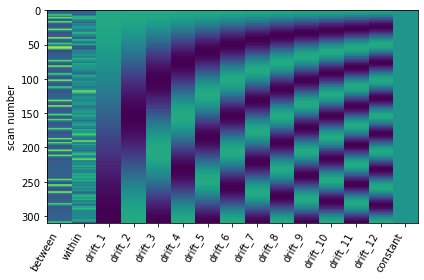

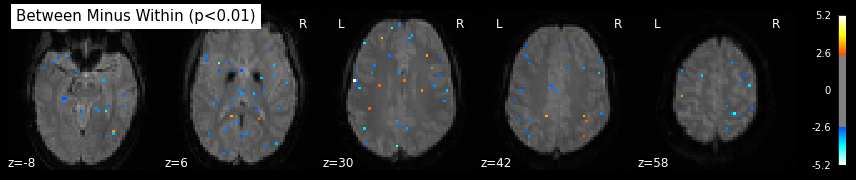

In [0]:
# An example subject

glm16 = GLM(subject_number=16)
glm16.plot_z_map(fpr=.01)

### 3.3. Model Construction

We built the Classifier class below to facilitate simultaneous model analysis, visualization, and performance reporting in a shell that could be instantiated for each subject. This object-oriented design provided referenceable organization for the results of our classifiers after they had been preprocessed and fit to chosen target variables, streamlining the preparation of data from the file system directly to the comparative analysis of model performance across all subjects that we conduct later in section 3.4. The simple clear() method is called during single-subject model evaluation to wipe the results before selecting new processing conditions. The visualize() and report() methods, which provide visual and textual comparisons of classification accuracy by model, can call fit() by themselves with the appropriate parameters so that surplus lines of code can be avoided during evaluation. The models we selected to evaluate were chosen based on their well-documented advantages for classifying large volumes of data with high numbers of features and their consequent popularity in computational neuroscience.

In [0]:
class Classifier(object):

    def __init__(self, subject_number, random_state):
        self.subject_number = subject_number
        self.subject_data = SubjectData(self.subject_number)
        self.random_state = random_state
        self.classifier_results = {}

        # establish the estimators upon initialization so that they can be modified during testing
        from sklearn.svm import LinearSVC, SVC
        from sklearn.linear_model import LogisticRegression, RidgeClassifier
        from sklearn.naive_bayes import GaussianNB
        
        lin_svc = LinearSVC(max_iter=10000, dual=False)
        svm = SVC(C=1., kernel="linear")
        log_l2 = LogisticRegression(C=1., random_state=self.random_state, solver='liblinear')
        log_l1 = LogisticRegression(C=1., penalty='l1', random_state=self.random_state, solver='liblinear')
        ridge = RidgeClassifier(alpha=1., solver='lsqr')
        gnb = GaussianNB()

        self.estimators = {
            'linearSVC':lin_svc,
            'SVC': svm,
            'log l2': log_l2,
            'log l1': log_l1,
            'ridge': ridge,
            'GNB': gnb
        }

    def drop_high_offsets(self):
        return self.subject_data.data[self.subject_data.data['offset'] < 1]

    def fit(self, target, filtered=False, PCA=False):
        # construct feature and target sets
        if target == 'community':
            if filtered:
                features = self.drop_high_offsets().drop(['offset', 'item', 'transition', 'onset'], axis=1)
                targets = self.drop_high_offsets()['item'].map(lambda item_label: list(item_label)[0])
            else:
                features = self.subject_data.data.drop(['offset', 'item', 'transition', 'onset'], axis=1)
                targets = self.subject_data.data['item'].map(lambda item_label: list(item_label)[0])
        elif target == 'transition':
            if filtered:
                features = self.drop_high_offsets().drop(['offset', 'item', 'transition', 'onset'], axis=1)
                targets = self.drop_high_offsets()['transition']
            else:
                features = self.subject_data.data.drop(['offset', 'item', 'transition', 'onset'], axis=1)
                targets = self.subject_data.data['transition']
        else:
            raise ValueError("Valid target types are 'community' and 'transition'.")
        
        # standardize features if using PCA
        if PCA:            
            from sklearn.decomposition import PCA
            from sklearn.preprocessing import StandardScaler
            # instantiate the PCA object and request ten components
            pca = PCA(n_components=10, random_state=self.random_state)
            # standardize the features so they are all on the same scale
            features_standardized = StandardScaler().fit_transform(features.to_numpy())
            # transform the standardized features using the PCA algorithm
            features = pca.fit_transform(features_standardized)
            
        from sklearn.model_selection import KFold
        from sklearn.model_selection import cross_val_score
        for estimator_name, estimator_object in self.estimators.items():
            # run each algorithm with 10-fold cross validation
            kfold = KFold(n_splits=10, random_state=self.random_state, shuffle=True)
            scores = cross_val_score(estimator=estimator_object, X=features, y=targets, cv=kfold)
            # store means and standard deviations in a dictionary
            self.classifier_results[estimator_name] = (scores.mean(), scores.std())

    def clear(self):
        # wipe the results of any prior fits
        self.classifier_results = {}

    def visualize(self, target, filtered=False, PCA=False):
        if self.classifier_results:
            # visual comparison of classifiers
            %matplotlib inline
            import matplotlib.pyplot as plt
            from matplotlib import cm
            from matplotlib.colors import Normalize
            cmaper = cm.get_cmap('YlGnBu')
            means = [mean*100 for (mean, std) in self.classifier_results.values()]
            normer = Normalize(vmin=min(means)*0.95, vmax=max(means)*1.05)
            plt.bar(range(len(self.classifier_results)), means, align='center', color=cmaper(normer(means)))
            plt.xticks(range(len(self.classifier_results)), list(self.classifier_results.keys()))
            plt.ylim(min(means)-1, max(means)+1)
            plt.ylabel('Mean Classification Accuracy')
            plt.xlabel('Classifier')
            plt.title(f'{target} classification accuracy for different classifiers')
            plt.show()
        else:
            self.fit(target, filtered, PCA)
            self.visualize(target, filtered, PCA)
    
    def report(self, target, filtered=False, PCA=False):
        if self.classifier_results:
            for classifier_name, scores in self.classifier_results.items():
                print(classifier_name + ": \n\t" + f'mean accuracy={scores[0]:.2%}, ' + f'standard deviation: +/- {scores[1]:.2%}' +"\n")
        else:
            self.fit(target, filtered, PCA)
            self.report(target, filtered, PCA)

### 3.4. Model Evaluation

The examples below visualize and report the performance of various models trained on the first subject's data to classify transitions using 10-fold cross validation. Different combinations of modeling conditions are compared. First, we examined the performance of models trained on the full unscaled content of all of the first subject's runs. In this case, the ridge classifier was the most accurate predictor of transition type.

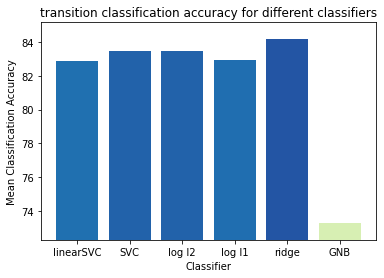

In [0]:
sub1model = Classifier(subject_number=1, random_state=3000)
sub1model.visualize(target='transition')

In [0]:
sub1model.report(target='transition')

linearSVC: 
	mean accuracy=82.88%, standard deviation: +/- 4.67%

SVC: 
	mean accuracy=83.50%, standard deviation: +/- 5.58%

log l2: 
	mean accuracy=83.50%, standard deviation: +/- 5.58%

log l1: 
	mean accuracy=82.92%, standard deviation: +/- 6.10%

ridge: 
	mean accuracy=84.17%, standard deviation: +/- 6.27%

GNB: 
	mean accuracy=73.29%, standard deviation: +/- 8.16%



Next, we found that removing from the subject's dataset the events that took place more than one second prior to the scans representing them slightly increased the mean performance of all classifiers except Gaussian Naive Bayes, though it also broadened their standard deviations by 3-8%.

In [0]:
sub1model.clear()
sub1model.report(target='transition', filtered=True)

linearSVC: 
	mean accuracy=86.25%, standard deviation: +/- 10.38%

SVC: 
	mean accuracy=85.00%, standard deviation: +/- 13.46%

log l2: 
	mean accuracy=86.25%, standard deviation: +/- 10.38%

log l1: 
	mean accuracy=86.25%, standard deviation: +/- 10.38%

ridge: 
	mean accuracy=86.25%, standard deviation: +/- 10.38%

GNB: 
	mean accuracy=71.25%, standard deviation: +/- 11.25%



We also found that applying principal component analysis (PCA) to the subject's dataset resulted in identical mean accuracies for all classifiers except Gaussian Naive Bayes, though its accuracy still increased. The standard deviations of all classifiers except GNB increased by up to 2%, whereas the GNB's standard deviation dropped by 1%.

In [0]:
sub1model.clear()
sub1model.report(target='transition', PCA=True)

linearSVC: 
	mean accuracy=85.42%, standard deviation: +/- 6.79%

SVC: 
	mean accuracy=85.42%, standard deviation: +/- 6.19%

log l2: 
	mean accuracy=85.42%, standard deviation: +/- 6.79%

log l1: 
	mean accuracy=85.42%, standard deviation: +/- 6.79%

ridge: 
	mean accuracy=85.42%, standard deviation: +/- 6.79%

GNB: 
	mean accuracy=79.67%, standard deviation: +/- 7.18%



Finally, applying both conditions to the system revealed performance increases for the linearSVC, SVC, and ridge models compared to the full unscaled dataset, but poorer performance for the logistic regression models. GNB rose drastically to become the most effective and precise model of all under these conditions. All models except GNB had as broad or broader standard deviations in this case than either for the filtered condition or PCA alone. Overall, we determined that a logistic regression of either regularization type or ridge classifier trained using high offset filtering or a GNB combined with both high offset filtering and PCA would be equally ideal transition classifier models, as they were all able to distinguish 'between' transitions from 'within' transitions with an accuracy of 86.25% +/- 10.38%. This degree of accuracy is resoundingly higher than a 50/50 guess, so the results for subject 1 satisfactorily support our second hypothesis: we can indeed train machine learning models to correctly classify the types of transitions visual stimuli make as they traverse a graph with a hidden underlying community structure simply from neuroimaging data.

In [0]:
sub1model.clear()
sub1model.report(target='transition', filtered=True, PCA=True)

linearSVC: 
	mean accuracy=83.75%, standard deviation: +/- 13.75%

SVC: 
	mean accuracy=85.00%, standard deviation: +/- 13.46%

log l2: 
	mean accuracy=82.50%, standard deviation: +/- 13.92%

log l1: 
	mean accuracy=82.50%, standard deviation: +/- 13.92%

ridge: 
	mean accuracy=85.00%, standard deviation: +/- 13.46%

GNB: 
	mean accuracy=86.25%, standard deviation: +/- 10.38%



The examples below demonstrate the same comparisons as above but examine community label classification using subject 19. First, we see that the SVC model was the most accurate predictor of the community membership of perceived items when trained on the full unscaled dataset.

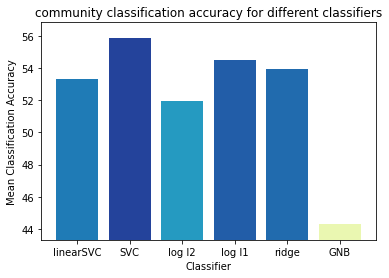

In [0]:
sub19model = Classifier(subject_number=19, random_state=3000)
sub19model.visualize(target='community')

In [0]:
sub19model.report(target='community')

linearSVC: 
	mean accuracy=53.29%, standard deviation: +/- 6.22%

SVC: 
	mean accuracy=55.83%, standard deviation: +/- 8.79%

log l2: 
	mean accuracy=51.96%, standard deviation: +/- 6.06%

log l1: 
	mean accuracy=54.50%, standard deviation: +/- 6.32%

ridge: 
	mean accuracy=53.96%, standard deviation: +/- 8.26%

GNB: 
	mean accuracy=44.33%, standard deviation: +/- 9.81%



Removing items with high offset times from the dataset permitted a slight increase in the mean accuracy of all community classifier models, but at the cost of more than doubling their standard deviations in nearly all cases.

In [0]:
sub19model.clear()
sub19model.report(target='community', filtered=True)

linearSVC: 
	mean accuracy=52.92%, standard deviation: +/- 18.93%

SVC: 
	mean accuracy=51.81%, standard deviation: +/- 18.41%

log l2: 
	mean accuracy=52.92%, standard deviation: +/- 20.79%

log l1: 
	mean accuracy=55.42%, standard deviation: +/- 15.82%

ridge: 
	mean accuracy=55.28%, standard deviation: +/- 18.48%

GNB: 
	mean accuracy=46.11%, standard deviation: +/- 13.22%



In contrast, applying PCA to the data reduced the mean accuracy of all models except GNB. However, it also reduced the standard deviation of the SVC and ridge models, making them more precise. Combining PCA with high offset filtering made little difference except in the doubling of standard deviation, so based on subject 19's runs, the ideal community classifier model would simply be an SVC trained on the full unscaled dataset.

In [0]:
sub19model.clear()
sub19model.report(target='community', PCA=True)

linearSVC: 
	mean accuracy=51.83%, standard deviation: +/- 7.39%

SVC: 
	mean accuracy=47.46%, standard deviation: +/- 6.90%

log l2: 
	mean accuracy=50.54%, standard deviation: +/- 8.91%

log l1: 
	mean accuracy=50.54%, standard deviation: +/- 8.91%

ridge: 
	mean accuracy=51.88%, standard deviation: +/- 7.03%

GNB: 
	mean accuracy=49.25%, standard deviation: +/- 9.93%



In [0]:
sub19model.clear()
sub19model.report(target='community', filtered=True, PCA=True)

linearSVC: 
	mean accuracy=51.39%, standard deviation: +/- 24.85%

SVC: 
	mean accuracy=51.25%, standard deviation: +/- 19.62%

log l2: 
	mean accuracy=52.50%, standard deviation: +/- 24.25%

log l1: 
	mean accuracy=52.50%, standard deviation: +/- 24.25%

ridge: 
	mean accuracy=51.25%, standard deviation: +/- 23.51%

GNB: 
	mean accuracy=48.89%, standard deviation: +/- 22.50%



To more rigorously test our second and third hypotheses, we had to take into account the whole group of subjects. The code blocks below record the performance of a transition classifier trained on the full unscaled datasets of all 20 subjects using each type of model our system incorporated. This took about an hour and a half to run altogether. The resulting means and standard deviations of model accuracies were stored in a DataFrame called transition_classifier_performances together with each subject's accuracy on the behavioral task. We constructed the plots in Figure 2 using these accuracies to check for correlations between behavioral task performance and classifiability of transitions from brain data by any of the models, but we found no such conclusive patterns. Then, we repeated the procedure on a community label classifier and were able to generate the similarly inconclusive plots shown in Figure 3.

In [0]:
performance = {'linearSVC': [],
               'SVC': [],
               'log l2': [],
               'log l1': [],
               'ridge': [],
               'GNB': [],
               'accuracy': []}

for i in range(20):
    classifier_i = Classifier(i + 1, random_state=3000)
    classifier_i.fit(target='transition')
    for estimator in classifier_i.classifier_results.keys():
        performance[estimator].append(classifier_i.classifier_results[estimator])
    performance['accuracy'].append(classifier_i.subject_data.subject_accuracy)

In [0]:
transition_classifier_performances = pd.DataFrame(performance)

In [0]:
transition_classifier_performances.head()

,linearSVC,SVC,log l2,log l1,ridge,GNB,accuracy
0,"(0.8287500000000001, 0.04667596633529224)","(0.8350000000000002, 0.055752428945592444)","(0.8350000000000002, 0.055752428945592444)","(0.8291666666666668, 0.06101001739241042)","(0.8416666666666668, 0.0626941429126801)","(0.7329166666666667, 0.08157413976118767)",0.96375
1,"(0.805, 0.0839105012630852)","(0.805, 0.0839105012630852)","(0.8045833333333332, 0.09906595025537282)","(0.7983333333333332, 0.09636086688415932)","(0.805, 0.0839105012630852)","(0.61625, 0.11425255285258766)",0.53875
2,"(0.8724999999999999, 0.12178076841421046)","(0.8724999999999999, 0.12178076841421046)","(0.8724999999999999, 0.12178076841421046)","(0.8724999999999999, 0.12178076841421046)","(0.8724999999999999, 0.12178076841421046)","(0.6, 0.17844817174742922)",0.08375
3,"(0.7991666666666667, 0.08856102729505545)","(0.7991666666666667, 0.08856102729505545)","(0.7991666666666667, 0.08856102729505545)","(0.7991666666666667, 0.08856102729505545)","(0.7991666666666667, 0.08856102729505545)","(0.60875, 0.1405155438218689)",0.93250
4,"(0.8545833333333335, 0.09896074558463405)","(0.8545833333333335, 0.09896074558463405)","(0.8545833333333335, 0.09896074558463405)","(0.8483333333333334, 0.0954375886814694)","(0.8545833333333335, 0.09896074558463405)","(0.8545833333333335, 0.09896074558463405)",0.57000


Across the whole group of subjects, the logistic regression model with L2 regularization was on average the most effective classifier of transition type, although there was a four-way tie for highest mean accuracy between it and the linear SVC, SVC, and ridge classifier models at 88.0417%.

In [0]:
transition_classifier_means = transition_classifier_performances.drop('accuracy', axis=1).applymap(
    lambda scores: scores[0]
)

# statistical information about the spread of transition classifier performances
transition_classifier_means.describe()

,linearSVC,SVC,log l2,log l1,ridge,GNB
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.833854,0.834458,0.836042,0.827542,0.835125,0.689417
std,0.027493,0.027584,0.026093,0.029943,0.027478,0.082315
min,0.792500,0.798750,0.799167,0.779583,0.798750,0.596667
25%,0.808750,0.808750,0.813750,0.798958,0.808750,0.619062
50%,0.838125,0.838958,0.838958,0.830417,0.842292,0.657292
75%,0.850521,0.850521,0.850521,0.844896,0.850521,0.740208
max,0.880417,0.880417,0.880417,0.874167,0.880417,0.854583


In [0]:
# the Shapiro-Wilk test justifies the assumption of normality required for t-tests
# t-statistics generated by single sample T-tests can be used to reject null hypotheses
from scipy.stats import shapiro, ttest_1samp
from functools import partial

In [0]:
# apply Shapiro-Wilk test to the distribution of transition classifier accuracies for each model
transition_shapiro_results = transition_classifier_means.apply(shapiro)
transition_shapiro_results

linearSVC      (0.9412332773208618, 0.2529760003089905)
SVC           (0.9186748266220093, 0.09343565255403519)
log l2        (0.9391248226165771, 0.23080673813819885)
log l1        (0.9347795248031616, 0.19074752926826477)
ridge         (0.9166733622550964, 0.08551676571369171)
GNB          (0.8892562985420227, 0.026059472933411598)
dtype: object

In [0]:
# apply single sample T-test to verify that the transition classifiers are significantly more
# accurate than a coin toss
transition_classifier_t_stats = transition_classifier_means.apply(partial(ttest_1samp, popmean=0.5))
transition_classifier_t_stats

linearSVC       (54.30627119994117, 2.61593646580144e-22)
SVC          (54.224435808335116, 2.6915045174288655e-22)
log l2        (57.595930991927055, 8.612413841461606e-23)
log l1         (48.92054283479008, 1.877603778047628e-21)
ridge          (54.54252121482822, 2.410046104808136e-22)
GNB           (10.290949834048115, 3.309309984273153e-09)
dtype: object

All models except the GNB classifier pass the Shapiro-Wilk normality test with non-significant p-values (p>.05), so t-tests are justified on the rest. Since all t-statistics calculated for transition classifier models were considerably larger than 1, we can conclude that each algorithm we used permits rejection of the null hypothesis challenging hypothesis two. Our work supports the contention that the motion of visual stimuli between discretely organized regions of a visual space can be distinguished from their motion within such regions by supervised machine learning systems trained on fMRI recordings of the brains of their observers.

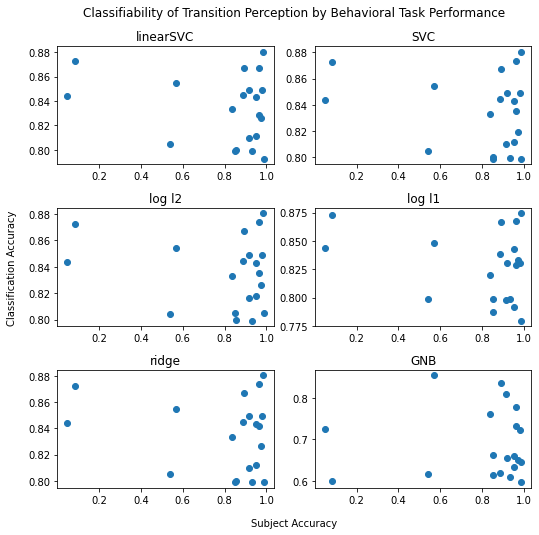

In [0]:
# visual comparison of transition classifiers
%matplotlib inline
import matplotlib.pyplot as plt

means = transition_classifier_performances

x = transition_classifier_performances['accuracy']

fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(8)

ax = fig.add_subplot(111, frameon=False, xticks=[], yticks=[])

ax1 = fig.add_subplot(321)
ax1.scatter(x, transition_classifier_means['linearSVC'])
ax1.set_title('linearSVC')

ax2 = fig.add_subplot(322)
ax2.scatter(x, transition_classifier_means['SVC'])
ax2.set_title('SVC')

ax3 = fig.add_subplot(323)
ax3.scatter(x, transition_classifier_means['log l2'])
ax3.set_title('log l2')

ax4 = fig.add_subplot(324)
ax4.scatter(x, transition_classifier_means['log l1'])
ax4.set_title('log l1')

ax5 = fig.add_subplot(325)
ax5.scatter(x, transition_classifier_means['ridge'])
ax5.set_title('ridge')

ax6 = fig.add_subplot(326)
ax6.scatter(x, transition_classifier_means['GNB'])
ax6.set_title('GNB')

ax.set_xlabel("Subject Accuracy", labelpad=30)
ax.set_ylabel("Classification Accuracy", labelpad=40)
ax.set_title('Classifiability of Transition Perception by Behavioral Task Performance', pad=30)
plt.tight_layout()

In [0]:
performance = {'linearSVC': [],
               'SVC': [],
               'log l2': [],
               'log l1': [],
               'ridge': [],
               'GNB': [],
               'accuracy': []}

for i in range(20):
    classifier_i = Classifier(i + 1, random_state=3000)
    classifier_i.fit(target='community')
    for estimator in classifier_i.classifier_results.keys():
        performance[estimator].append(classifier_i.classifier_results[estimator])
    performance['accuracy'].append(classifier_i.subject_data.subject_accuracy)

In [0]:
community_classifier_performances = pd.DataFrame(performance)

In [0]:
community_classifier_performances.head()

,linearSVC,SVC,log l2,log l1,ridge,GNB,accuracy
0,"(0.6241666666666666, 0.11699062165641977)","(0.62375, 0.11908286680571083)","(0.6370833333333333, 0.11562706454613278)","(0.6174999999999999, 0.11428825642013947)","(0.6304166666666666, 0.11174204545390344)","(0.44708333333333333, 0.12860158652036746)",0.96375
1,"(0.6483333333333333, 0.13078555390833924)","(0.6291666666666667, 0.131140827611643)","(0.6224999999999999, 0.13280102074574243)","(0.6229166666666666, 0.13134255995508676)","(0.66125, 0.13273367759037893)","(0.39583333333333337, 0.09583333333333334)",0.53875
2,"(0.63875, 0.08825173117596932)","(0.6325000000000001, 0.09116910417216764)","(0.62625, 0.08482109440201509)","(0.6258333333333334, 0.08583333333333333)","(0.645, 0.10154706079230238)","(0.5120833333333333, 0.10358923287034548)",0.08375
3,"(0.6404166666666666, 0.08354244596477756)","(0.6283333333333334, 0.06077622890571607)","(0.6216666666666666, 0.072476049683863)","(0.6220833333333333, 0.04044243165015894)","(0.6404166666666666, 0.07286426688637504)","(0.5495833333333333, 0.12507567153971677)",0.93250
4,"(0.5862499999999999, 0.10376673225182635)","(0.5795833333333333, 0.09237322393421157)","(0.5733333333333334, 0.11055730037707444)","(0.5729166666666667, 0.08296271753022558)","(0.5733333333333334, 0.09939399713597731)","(0.5599999999999999, 0.08364940060886403)",0.57000


Across the whole group of subjects, the SVC model was on average the most effective classifier of community membership, and sported the highest overall average accuracy of 69.125%.

In [0]:
community_classifier_means = community_classifier_performances.drop('accuracy', axis=1).applymap(
    lambda scores: scores[0]
)

# statistical information about the spread of community classifier performances
community_classifier_means.describe()

,linearSVC,SVC,log l2,log l1,ridge,GNB
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.588438,0.591896,0.585562,0.580771,0.590708,0.524542
std,0.058951,0.056407,0.054974,0.059426,0.060761,0.062273
min,0.490000,0.490000,0.496250,0.446250,0.483750,0.395833
25%,0.534167,0.550521,0.537812,0.540938,0.540521,0.492500
50%,0.586875,0.596250,0.583542,0.585208,0.580417,0.518542
75%,0.642292,0.630000,0.628958,0.623646,0.647500,0.560937
max,0.685000,0.691250,0.672500,0.679167,0.685417,0.647917


In [0]:
# apply Shapiro-Wilk test to the distribution of transition classifier accuracies for each model
community_shapiro_results = community_classifier_means.apply(shapiro)
community_shapiro_results

linearSVC    (0.9338687062263489, 0.1832377165555954)
SVC          (0.9621423482894897, 0.5874812602996826)
log l2       (0.945598304271698, 0.30516257882118225)
log l1       (0.9660413265228271, 0.6700732707977295)
ridge        (0.9356772899627686, 0.1984386146068573)
GNB          (0.9790956377983093, 0.9218935966491699)
dtype: object

In [0]:
# apply single sample T-test to ensure that the community classifiers are significantly more
# accurate than a uniform guess
community_classifier_t_stats = community_classifier_means.apply(partial(ttest_1samp, popmean=0.33))
community_classifier_t_stats

linearSVC     (19.605419460029143, 4.573633010829978e-14)
SVC          (20.763911531201718, 1.6094064678988662e-14)
log l2         (20.78990508195723, 1.573102112886068e-14)
log l1         (18.87178024853639, 9.126783811486934e-14)
ridge         (19.188752419603443, 6.751519314380495e-14)
GNB            (13.971019118412835, 1.90813333689302e-11)
dtype: object

All models pass the Shapiro-Wilk normality test with non-significant p-values (p>.05), so t-tests are justified. Since all t-statistics calculated for community classifier models were larger than 1, we can conclude that each algorithm we used permits rejection of the null hypothesis challenging hypothesis three. Our work supports the contention that the spatial relations of visual stimuli can be accurately predicted by supervised machine learning systems trained on fMRI recordings of the brains of their observers.

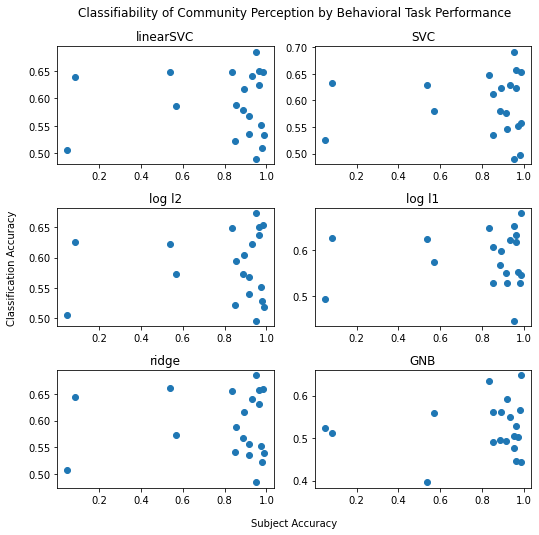

In [0]:
# visual comparison of classifiers
%matplotlib inline
import matplotlib.pyplot as plt

x = community_classifier_performances['accuracy']

fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(8)

ax = fig.add_subplot(111, frameon=False, xticks=[], yticks=[])

ax1 = fig.add_subplot(321)
ax1.scatter(x, community_classifier_means['linearSVC'])
ax1.set_title('linearSVC')

ax2 = fig.add_subplot(322)
ax2.scatter(x, community_classifier_means['SVC'])
ax2.set_title('SVC')

ax3 = fig.add_subplot(323)
ax3.scatter(x, community_classifier_means['log l2'])
ax3.set_title('log l2')

ax4 = fig.add_subplot(324)
ax4.scatter(x, community_classifier_means['log l1'])
ax4.set_title('log l1')

ax5 = fig.add_subplot(325)
ax5.scatter(x, community_classifier_means['ridge'])
ax5.set_title('ridge')

ax6 = fig.add_subplot(326)
ax6.scatter(x, community_classifier_means['GNB'])
ax6.set_title('GNB')

ax.set_xlabel("Subject Accuracy", labelpad=30)
ax.set_ylabel("Classification Accuracy", labelpad=40)
ax.set_title('Classifiability of Community Perception by Behavioral Task Performance', pad=30)
plt.tight_layout()

None of the models for classifying either target seemed to correlate strongly with subject performance records, so the cover task used in this experiment is not a viable coordinator of the brain's legibility to learning algorithms.

### 3.5. Model Optimization

After comparing the results of these untuned models, we went on to optimize their performance by tweaking their hyperparameters. To keep our model optimization process as versatile as our model construction and evaluation processes, we adapted the Classifier class into a similar Tuner class which performed grid search hyperparameter selection by cross validation on all tunable model types.

In [0]:
class Tuner(object):

    def __init__(self, subject_number, random_state):
        self.subject_number = subject_number
        self.subject_data = SubjectData(self.subject_number)
        self.random_state = random_state
        self.tuner_results = {}

    def drop_high_offsets(self):
        return self.subject_data.data[self.subject_data.data['offset'] < 1]

    def fit(self, target, filtered=False, PCA=False):
        # construct feature and target sets
        if target == 'community':
            if filtered:
                features = self.drop_high_offsets().drop(['offset', 'item', 'transition', 'onset'], axis=1)
                targets = self.drop_high_offsets()['item'].map(lambda item_label: list(item_label)[0])
            else:
                features = self.subject_data.data.drop(['offset', 'item', 'transition', 'onset'], axis=1)
                targets = self.subject_data.data['item'].map(lambda item_label: list(item_label)[0])
        elif target == 'transition':
            if filtered:
                features = self.drop_high_offsets().drop(['offset', 'item', 'transition', 'onset'], axis=1)
                targets = self.drop_high_offsets()['transition']
            else:
                features = self.subject_data.data.drop(['offset', 'item', 'transition', 'onset'], axis=1)
                targets = self.subject_data.data['transition']
        else:
            raise ValueError("Valid target types are 'community' and 'transition'.")

        # establish grid search estimators
        from sklearn.model_selection import GridSearchCV
        from sklearn.svm import LinearSVC, SVC
        from sklearn.linear_model import LogisticRegression, RidgeClassifier

        # GNB is omitted for lack of hyperparameters to tune
        self.grid_search_estimators = {
            'linearSVC': GridSearchCV(
                estimator=LinearSVC(max_iter=10000, dual=False),
                param_grid={'C': [.001, .01, .1, 1.0, 10.0, 100.0]}, cv=3),
            'SVC': GridSearchCV(
                estimator=SVC(C=1., kernel="linear"),
                param_grid={'C': [.001, .01, .1, 1.0, 10.0, 100.],
                            'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}, cv=3),
            'log l2': GridSearchCV(
                estimator=LogisticRegression(C=1., penalty='l2',
                                             random_state=self.random_state, solver='liblinear'),
                param_grid={'C': [.001, .01, .1, 1.0, 10.0, 100.0],
                            'solver': ['liblinear', 'saga']}, cv=3),
            'log l1': GridSearchCV(
                estimator=LogisticRegression(C=1., penalty='l1',
                                             random_state=self.random_state, solver='liblinear'),
                param_grid={'C': [.001, .01, .1, 1.0, 10.0, 100.0],
                            'solver': ['liblinear', 'saga']}, cv=3),
            'ridge': GridSearchCV(
                estimator=RidgeClassifier(alpha=1., solver='lsqr'),
                param_grid={'alpha': [.001, .01, .1, 1.0, 10.0, 100.0]}, cv=3)
        }
        
        # standardize features if using PCA
        if PCA:            
            from sklearn.decomposition import PCA
            from sklearn.preprocessing import StandardScaler
            # instantiate the PCA object and request ten components
            pca = PCA(n_components=10, random_state=self.random_state)
            # standardize the features so they are all on the same scale
            features_standardized = StandardScaler().fit_transform(features.to_numpy())
            # transform the standardized features using the PCA algorithm
            features = pca.fit_transform(features_standardized)

        for estimator_name, grid_search in self.grid_search_estimators.items():
            # check performance of each combination of hyperparameters selected for each algorithm
            grid_search.fit(X=features, y=targets)
            # store best scores without overfitting and note which parameter values generated them
            self.tuner_results[estimator_name] = (grid_search.best_score_, grid_search.best_params_)
    
    def clear(self):
        # wipe the results of any prior fits
        self.tuner_results = {}

    def report(self, target, filtered=False, PCA=False):
        if self.tuner_results:
            for classifier_name, results in self.tuner_results.items():
                print(classifier_name + ": \n\t" + f'best score={results[0]:.2%}, ' + f'best params: {results[1]}' +"\n")
        else:
            self.fit(target, filtered, PCA)
            self.report(target, filtered, PCA)

Returning to our examples of subject 1 for transition classification and subject 19 for community classification, we see the optimized scores and parameter sets for all models used in both cases below as reports of the Tuner class. Hyperparameter tuning for subject 1 under the high offset filtering condition resulted in a three-way tie between the SVC and the two logistic regression models at 87.51% accuracy. The optimal hyperparameters for these models included C values of 0.001 for each of them, the 'poly' kernel for the SVC, the 'saga' solver for the logistic regression model with L2 regularization, and the 'liblinear' solver for the logistic regression model with L1 regularization.

In [0]:
sub1tuner = Tuner(subject_number=1, random_state=3000)

In [0]:
# implemented using high offset filtering, which was previously found to aid accuracy
sub1tuner.report(target='transition', filtered=True)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

linearSVC: 
	best score=78.87%, best params: {'C': 0.001}

SVC: 
	best score=87.51%, best params: {'C': 0.001, 'kernel': 'poly'}

log l2: 
	best score=87.51%, best params: {'C': 0.001, 'solver': 'saga'}

log l1: 
	best score=87.51%, best params: {'C': 0.001, 'solver': 'liblinear'}

ridge: 
	best score=78.87%, best params: {'alpha': 0.001}



Hyperparameter tuning for subject 19 resulted in surprisingly poorer accuracy for all models. We struggled to interpret the meaning of this; if the performances of the untuned models had been much more significantly different from the probability of random selection, then the diminishment could be interpreted as compensation for overfitting. But in this case, the models all came within a 4-11% difference from the random baseline of one in three. The most accurate tuned community classifying model was the logistic regressor with L1 regularization at a 44.90% success rate for parameters C=0.001 and the 'saga' solver. Interestingly, the solvers favored by the logistic regressors classifying communities were swapped compared to those favored by the logistic regressors classifying transitions (e.g., the logistic regressor with L1 regularization classifying transitions instead performed best with the 'liblinear' solver, whereas that solver was preferred by the one with L2 regularization classifying communities, and the one with L2 regularization classifying transitions preferred the 'saga' solver).

In [0]:
sub19tuner = Tuner(subject_number=19, random_state=3000)

In [0]:
sub19tuner.report(target='community')

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

linearSVC: 
	best score=37.35%, best params: {'C': 0.001}

SVC: 
	best score=42.38%, best params: {'C': 0.001, 'kernel': 'poly'}

log l2: 
	best score=37.98%, best params: {'C': 0.1, 'solver': 'liblinear'}

log l1: 
	best score=44.90%, best params: {'C': 0.001, 'solver': 'saga'}

ridge: 
	best score=39.86%, best params: {'alpha': 0.001}



### 3.6. Model Testing

We tested the tuned hyperparameters on two other randomly chosen subjects, 4 and 8, for transition and community classification respectively. Comparing the tuned results to the results of the untuned model we had been using previously revealed the following changes in performance.

In [0]:
# before tuning
sub4model = Classifier(subject_number=4, random_state=3000)
# remove models that remain untuned as they are irrelevant to testing for improvement
sub4model.estimators = {key:val for key, val in sub4model.estimators.items() if key != 'GNB'}
sub4model.report(target='transition', filtered=True)

linearSVC: 
	mean accuracy=72.50%, standard deviation: +/- 12.25%

SVC: 
	mean accuracy=72.50%, standard deviation: +/- 12.25%

log l2: 
	mean accuracy=72.50%, standard deviation: +/- 12.25%

log l1: 
	mean accuracy=67.50%, standard deviation: +/- 16.01%

ridge: 
	mean accuracy=72.50%, standard deviation: +/- 12.25%



In [0]:
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression, RidgeClassifier
# after tuning
sub4model.clear()
sub4model.estimators = {
    'linearSVC': LinearSVC(C=0.001, max_iter=10000, dual=False),
    'SVC': SVC(C=0.001, kernel='poly'),
    'log l2': LogisticRegression(C=0.1, penalty='l2',
                                 random_state=sub4model.random_state, solver='liblinear'),
    'log l1': LogisticRegression(C=0.001, penalty='l1',
                                 random_state=sub4model.random_state, solver='saga'),
    'ridge': RidgeClassifier(alpha=0.001, solver='lsqr')
}
sub4model.report(target='transition', filtered=True)

linearSVC: 
	mean accuracy=72.50%, standard deviation: +/- 12.25%

SVC: 
	mean accuracy=76.25%, standard deviation: +/- 14.20%

log l2: 
	mean accuracy=72.50%, standard deviation: +/- 12.25%

log l1: 
	mean accuracy=76.25%, standard deviation: +/- 14.20%

ridge: 
	mean accuracy=72.50%, standard deviation: +/- 12.25%



As indicated by the results of our group-wide optimization, the SVC and logistic regressor (L1) models achieved the highest accuracy of 76.25% +/- 14.20% after tuning for transition classification. Furthermore, the results of optimizing models for subject 8 below show that the logistic regressor (L1) also received the greatest improvement in accuracy for community classification after tuning, though unlike the results for the group as a whole, the most accurate model for subject 8 post-tuning was the ridge classifier at a 65.71% +/- 12.06% success rate. 

In [0]:
# before tuning
sub8model = Classifier(subject_number=8, random_state=3000)
# remove models that remain untuned as they are irrelevant to testing for improvement
sub8model.estimators = {key:val for key, val in sub8model.estimators.items() if key != 'GNB'}
sub8model.report(target='community')

linearSVC: 
	mean accuracy=65.04%, standard deviation: +/- 12.30%

SVC: 
	mean accuracy=65.71%, standard deviation: +/- 11.04%

log l2: 
	mean accuracy=65.04%, standard deviation: +/- 13.22%

log l1: 
	mean accuracy=63.17%, standard deviation: +/- 10.70%

ridge: 
	mean accuracy=65.71%, standard deviation: +/- 12.06%



In [0]:
# after tuning
sub8model.clear()
sub8model.estimators = {
    'linearSVC': LinearSVC(C=0.001, max_iter=10000, dual=False),
    'SVC': SVC(C=0.001, kernel='poly'),
    'log l2': LogisticRegression(C=0.001, penalty='l2',
                                 random_state=sub4model.random_state, solver='saga'),
    'log l1': LogisticRegression(C=0.001, penalty='l1',
                                 random_state=sub4model.random_state, solver='liblinear'),
    'ridge': RidgeClassifier(alpha=0.001, solver='lsqr')
}
sub8model.report(target='community')

linearSVC: 
	mean accuracy=65.04%, standard deviation: +/- 12.30%

SVC: 
	mean accuracy=56.92%, standard deviation: +/- 12.72%

log l2: 
	mean accuracy=65.12%, standard deviation: +/- 12.16%

log l1: 
	mean accuracy=64.42%, standard deviation: +/- 14.32%

ridge: 
	mean accuracy=65.71%, standard deviation: +/- 12.06%



<a id="4"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 4. DISCUSSION

Our preliminary processing and analysis of this dataset began with the construction of the SubjectData pipeline, which we used extensively throughout the development of our learning models to load, clean, and organize voxel data into a minimally computationally expensive format. The exploration phase before model building mostly involved navigating voxel data by way of a general linear model (GLM) and constructing contrast map visualizations of a subject's brain and the matrix required to produce its image.

We built our Classifier system to repeatably generate and alter predictive models for transition types and community labels using linearSVC, SVC, logistic regression with L2 and L1 regularizations, ridge, and Gaussian Naive Bayes classification models. Both before and after hyperparameter tuning using the Tuner class, we found that the support vector machine and logistic regression based classifiers performed most accurately on both classification tasks. Specifically, the transition classification task is best served by SVC or logistic regression (L2 or L1 regularizations), and the community classification task is best served by logistic regression (L1 regularization). Both hypotheses two and three pertaining to these tasks were supported by the significant accuracy of our models, but the fourth hypothesis could not find ground.

Given more time and resources, future analyses could yield more insightful conclusions. For example, more diverse experimental paradigms could be used to explore the idea of neural representations of semantic categoories. While this experiment looked at physical movement of graphics between visual communities, other modalities or semantic categories coould eb evaluated to see if similar ROI's are used to subconsciously parse membership. An example might be using short audio recordings to delineate categorization of narrative. Other versions could be as simple as categorizing tones being played in sequence where community membership depends on pitch. Better understanding of the regions that share roles in this semantic categorization help delineate roles within amodal meaning-making networks. Furthermore, more interesting semantic predictions, like the sadness of narrative or the funniness of a joke as semantic markers might be able to be predicted as we on a rudimentary level were able to predict community membership of simple visual representations. 

<a id="5"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">